This is a follow up of the preprocessing notebook, written by Arad HamidSamiee.

---

#Earthquake Magnitude Prediction#
(part 3 / 3)

In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator # will be utelized to label images

In [55]:
!unzip BaseData.zip

Archive:  BaseData.zip
   creating: BaseData/
   creating: BaseData/test/
  inflating: BaseData/test/Sample1973-06-04_Label0.jpg  
  inflating: BaseData/test/Sample1976-10-03_Label0.jpg  
  inflating: BaseData/test/Sample1980-10-02_Label0.jpg  
  inflating: BaseData/test/Sample1982-02-03_Label1.jpg  
  inflating: BaseData/test/Sample1984-10-01_Label0.jpg  
  inflating: BaseData/test/Sample1988-06-01_Label0.jpg  
  inflating: BaseData/test/Sample1990-06-01_Label1.jpg  
  inflating: BaseData/test/Sample1992-02-01_Label0.jpg  
  inflating: BaseData/test/Sample1993-02-01_Label1.jpg  
  inflating: BaseData/test/Sample1995-06-03_Label0.jpg  
  inflating: BaseData/test/Sample1999-02-02_Label0.jpg  
  inflating: BaseData/test/Sample2002-06-05_Label0.jpg  
  inflating: BaseData/test/Sample2002-10-08_Label1.jpg  
  inflating: BaseData/test/Sample2003-10-01_Label1.jpg  
  inflating: BaseData/test/Sample2007-06-01_Label0.jpg  
  inflating: BaseData/test/Sample2010-10-02_Label0.jpg  
  inflating: B

In [21]:
train = ImageDataGenerator()
train_dataset = train.flow_from_directory(directory = "BaseData/train/",
                                          target_size = (256,256),
                                          batch_size = 3,
                                          class_mode = 'binary')

Found 127 images belonging to 2 classes.


In [23]:
# Shows what classes have been translated into indexed classes
train_dataset.class_indices

{'0': 0, '1': 1}

In [24]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [38]:
model = models.Sequential([
                           layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu'),
                           layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
                           
                           layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu'),
                           layers.AvgPool2D(pool_size=(3,3), strides=(2,2)),
                           
                           layers.Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu'),
                           layers.AvgPool2D(pool_size=(3,3), strides=(2,2)),

                           layers.Dropout(rate=0.5),

                           layers.Dropout(rate=0.5),

                           layers.Flatten(),

                           layers.Dense(512, 'relu'),

                           layers.Dense(1,'relu')
                           ])

In [41]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='rmsprop')
# L1 : laplace
# l2 : Gaussian
# L2 = Weight Decay

In [42]:
model_fit = model.fit(train_dataset,
                      steps_per_epoch = 3,
                      epochs = 100
                      )

Epoch 1/100
3/3 [==============================] - 2s 338ms/step - loss: 1.7139 - accuracy: 0.8889
Epoch 2/100
3/3 [==============================] - 1s 341ms/step - loss: 8.6852 - accuracy: 0.3333
Epoch 3/100
3/3 [==============================] - 1s 341ms/step - loss: 3.4278 - accuracy: 0.7778
Epoch 4/100
3/3 [==============================] - 1s 342ms/step - loss: 6.8555 - accuracy: 0.5556
Epoch 5/100
3/3 [==============================] - 1s 343ms/step - loss: 6.8555 - accuracy: 0.5556
Epoch 6/100
3/3 [==============================] - 1s 339ms/step - loss: 3.4278 - accuracy: 0.7778
Epoch 7/100
3/3 [==============================] - 1s 233ms/step - loss: 4.4071 - accuracy: 0.7143
Epoch 8/100
3/3 [==============================] - 1s 337ms/step - loss: 6.8555 - accuracy: 0.5556
Epoch 9/100
3/3 [==============================] - 1s 340ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/100
3/3 [==============================] - 1s 337ms/step - loss: 5.1416 - accuracy: 0.6667
Epoch

BaseData/test//Sample1990-06-01_Label1.jpg


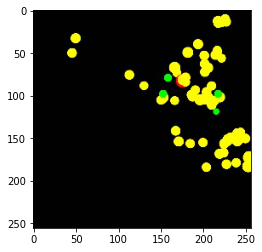

You'll be fine!

BaseData/test//Sample1982-02-03_Label1.jpg


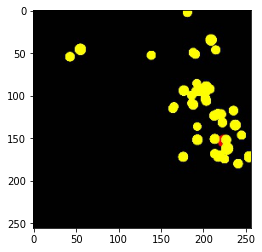

You'll be fine!

BaseData/test//Sample1988-06-01_Label0.jpg


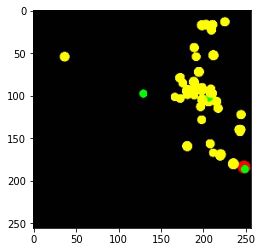

You'll be fine!

BaseData/test//Sample2011-06-01_Label1.jpg


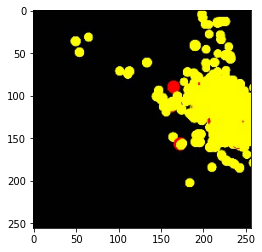

You'll be fine!

BaseData/test//Sample2019-02-01_Label0.jpg


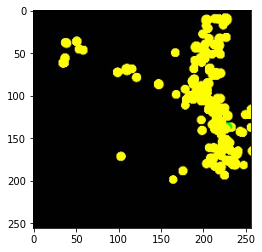

You'll be fine!

BaseData/test//Sample2020-10-03_Label0.jpg


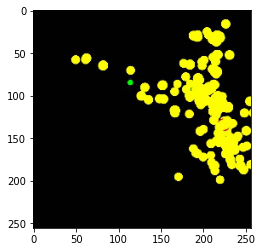

You'll be fine!

BaseData/test//Sample1984-10-01_Label0.jpg


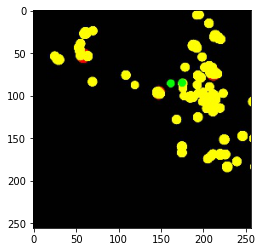

You'll be fine!

BaseData/test//Sample2015-06-01_Label1.jpg


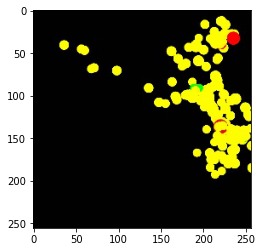

You'll be fine!

BaseData/test//Sample2020-02-02_Label0.jpg


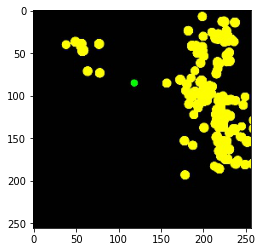

You'll be fine!

BaseData/test//Sample2020-06-01_Label0.jpg


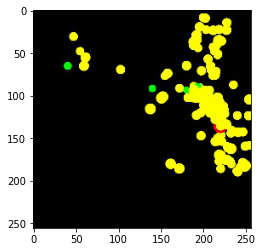

You'll be fine!

BaseData/test//Sample2007-06-01_Label0.jpg


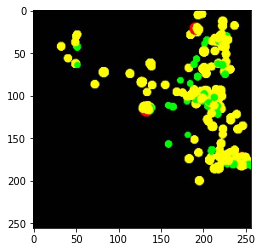

You'll be fine!

BaseData/test//Sample2003-10-01_Label1.jpg


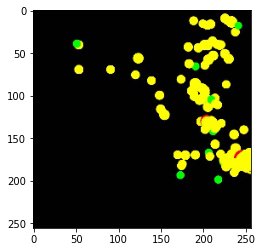

You'll be fine!

BaseData/test//Sample2010-10-02_Label0.jpg


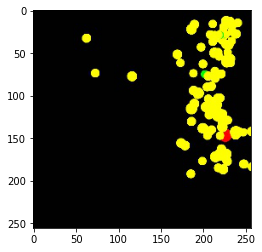

You'll be fine!

BaseData/test//Sample1999-02-02_Label0.jpg


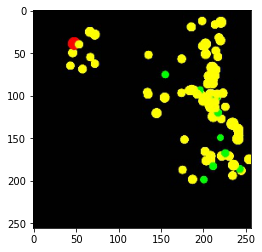

You'll be fine!

BaseData/test//Sample1973-06-04_Label0.jpg


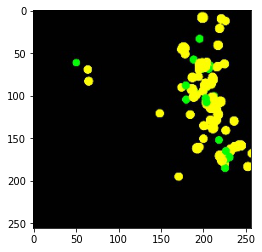

You'll be fine!

BaseData/test//Sample2019-10-01_Label0.jpg


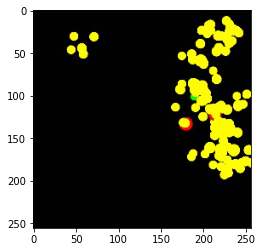

You'll be fine!

BaseData/test//Sample1993-02-01_Label1.jpg


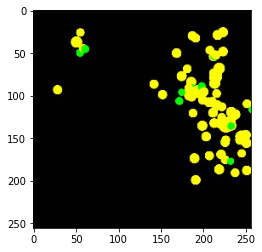

You'll be fine!

BaseData/test//Sample2002-10-08_Label1.jpg


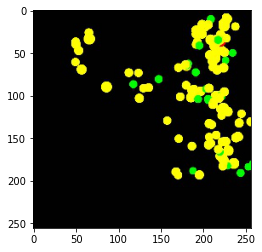

You'll be fine!

BaseData/test//Sample1976-10-03_Label0.jpg


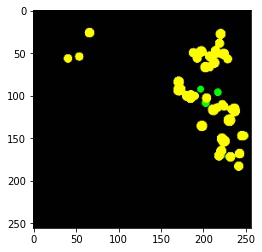

You'll be fine!

BaseData/test//Sample2002-06-05_Label0.jpg


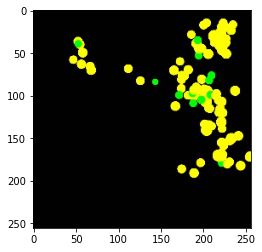

You'll be fine!

BaseData/test//Sample1980-10-02_Label0.jpg


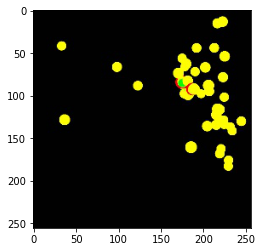

You'll be fine!

BaseData/test//Sample1992-02-01_Label0.jpg


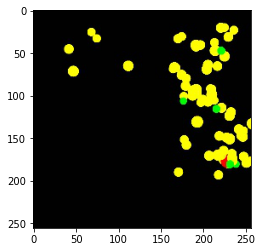

You'll be fine!

BaseData/test//Sample2016-02-02_Label0.jpg


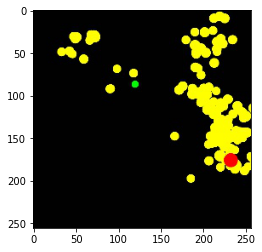

You'll be fine!

BaseData/test//Sample1995-06-03_Label0.jpg


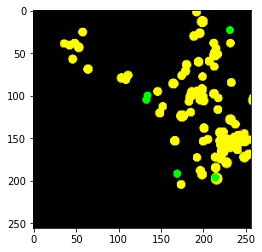

You'll be fine!



In [56]:
TestDataPath = 'BaseData/test'
for i in os.listdir(TestDataPath):
    img = image.load_img(TestDataPath+'//'+i)
    print(TestDataPath+'//'+i)
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X, axis=0)
    images = np.vstack([X])
    label = model.predict(images)
    if label == 0:
        print("You'll be fine.\n")
    elif label == 1:
        print("Oh oh, That's BAD news!\n")
    else:
        print("\nABOMINATION!!!\n")